In [48]:
# Load libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [49]:
# Load pdf text and headings from the pickle file
pdf_texts = pickle.load(open("Src/pdf_texts.pkl", "rb"))                        # Texts are extracted from the pdf
pdf_headings = pickle.load(open("Src/pdf_headings.pkl", "rb"))                  # Headings are extracted from the pdf text
pdf_headings_context = pickle.load(open("Src/pdf_headings_context.pkl", "rb"))  # Surrounding text of headings helps to identify headings correctly and avoid duplicates

#### Visualisation 1. Word Cloud

In [50]:
# add all texts to a single string
corpus = ""
for _, text in pdf_texts.items():
    corpus += text

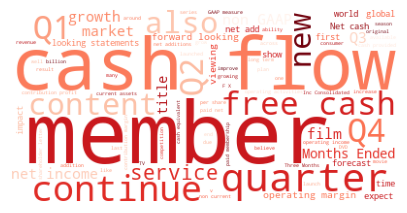

In [51]:
# plot the word cloud, adding extra local stopwords
cloud = WordCloud(max_words=100, stopwords=stopwords.words("english") + ['Netflix', 'year', 'million', 'U', 'US'], background_color='white', colormap="Reds").generate(corpus)
plt.figure(figsize=(5, 5))
plt.imshow(cloud)
plt.axis("off")
plt.show()


In [52]:
# get the word frequencies from corpus
word_frequencies = cloud.process_text(corpus)
# sort the word frequencies in the descending order
sorted_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
# create a dataframe from the top 100 word frequencies
sorted_frequencies_df = pd.DataFrame(sorted_frequencies[:100], columns=['word', 'frequency'])
# export the dataframe to csv
# sorted_frequencies_df.to_csv('Src/word_frequencies.csv', index=False)

In [53]:
# show the most frequent 25 words
sorted_frequencies_df[:25]

,word,frequency
0,member,554
1,cash flow,450
2,quarter,413
3,continue,338
4,free cash,311
5,Q2,305
6,Q1,303
7,Q4,296
8,content,274
9,also,271


#### Visualisation 2. Text length distribution

In [54]:
# get text length for each file and store it in a dataframe
texts_length = [len(text.strip().split(" ")) for pdf_name, text in pdf_texts.items()]
texts_length_dict = dict(zip(pdf_texts.keys(), texts_length))
texts_length_df = pd.DataFrame.from_dict(texts_length_dict, orient='index', columns=['length']).reset_index().rename(columns={"index": "pdf_name"})

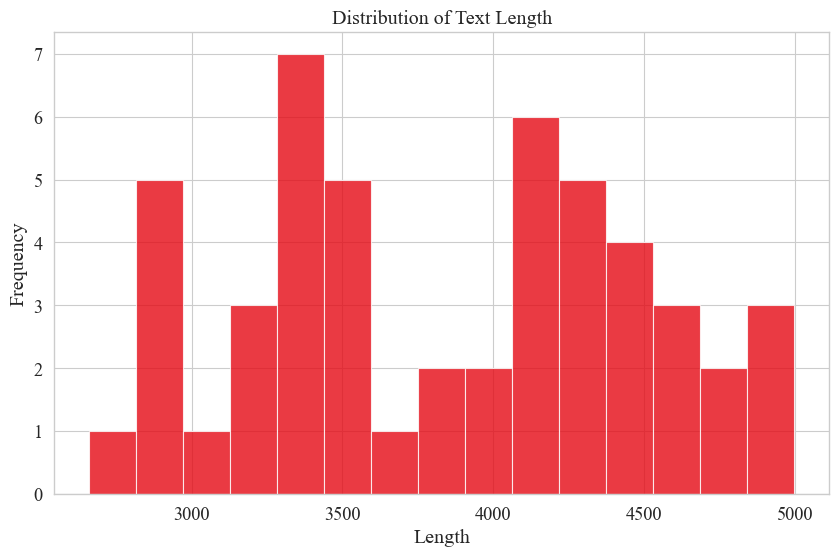

In [55]:
# plot the distribution of the text length
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.hist(texts_length, bins=15, color="#E50914", alpha=0.8)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length")
plt.show()

#### Visualisation 3. Headings count distribution

In [56]:
# get the number of headings for each file
headings_count = [len(headings) for pdf_name, headings in pdf_headings.items()]
headings_count_dict = {pdf_name: len(headings) for pdf_name, headings in pdf_headings.items()}

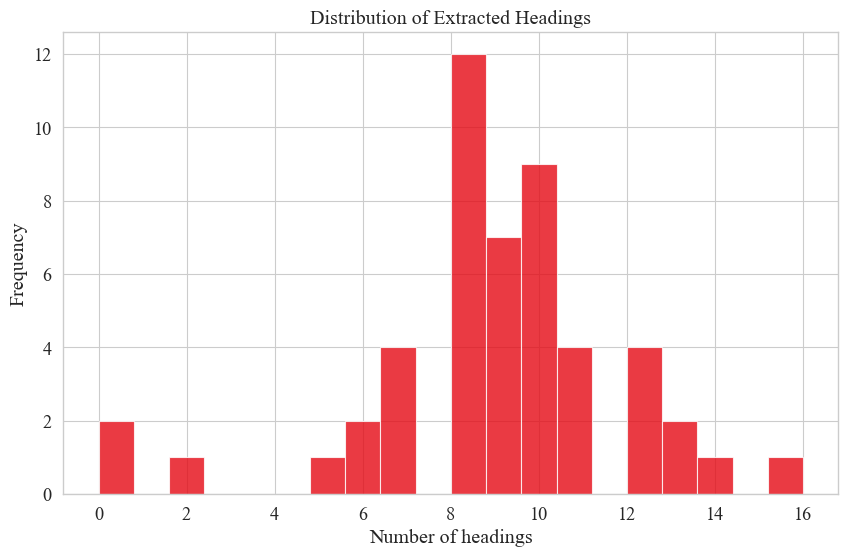

In [57]:
# plot the distribution of the number of headings
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.hist(headings_count, bins=20, color="#E50914", alpha=0.8)
plt.xlabel("Number of headings")
plt.ylabel("Frequency")
plt.title("Distribution of Extracted Headings")
plt.show()

#### Visualisation 4. Manual sentiment scores distribution

In [58]:
manual_scores_df = pd.read_csv("Scores/manual_polarity.csv")

In [59]:
# get the manual scores for each file
manual_scores = manual_scores_df["AverageManualScore"].values

<Figure size 1500x600 with 0 Axes>

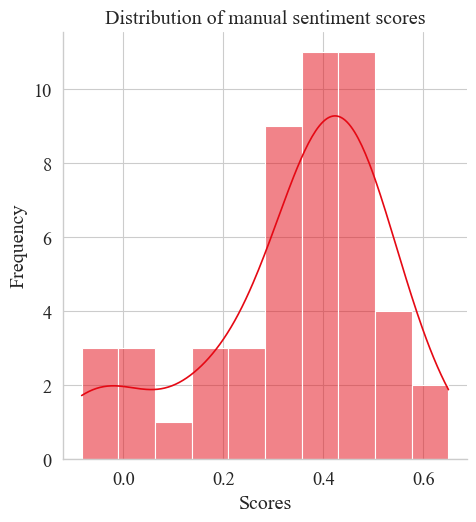

In [60]:
# plot the distribution of the manual sentiment scores
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.figure(figsize=(15, 6))
sns.displot(manual_scores, bins=10, color="#E50914", kde=True)
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Distribution of manual sentiment scores")
plt.show()

#### Visualisation 4. Text Length vs Manual Sentiment Score

In [61]:
df = pd.merge(texts_length_df, manual_scores_df, left_on='pdf_name', right_on='MyReportName', how='inner')

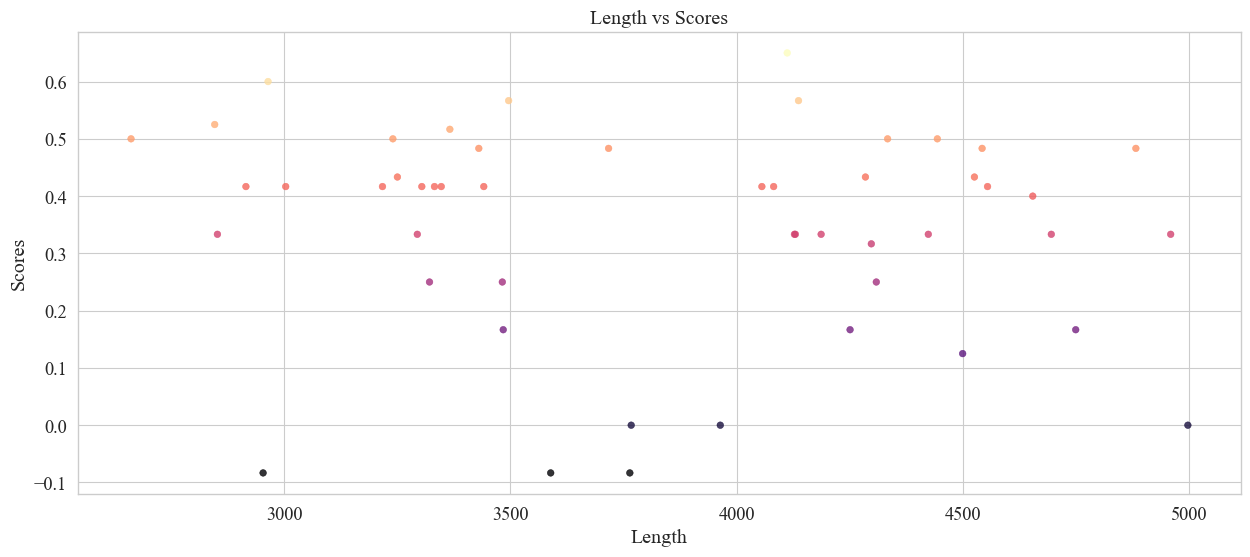

In [62]:
# visualise the scatter plot of the text length vs manual sentiment scores

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
# set font
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df["length"], y=df["AverageManualScore"], hue=df["AverageManualScore"], palette="magma", alpha=0.8, edgecolor=None)
plt.xlabel("Length")
plt.ylabel("Scores")
plt.title("Length vs Scores")
plt.legend().set_visible(False)
plt.show()